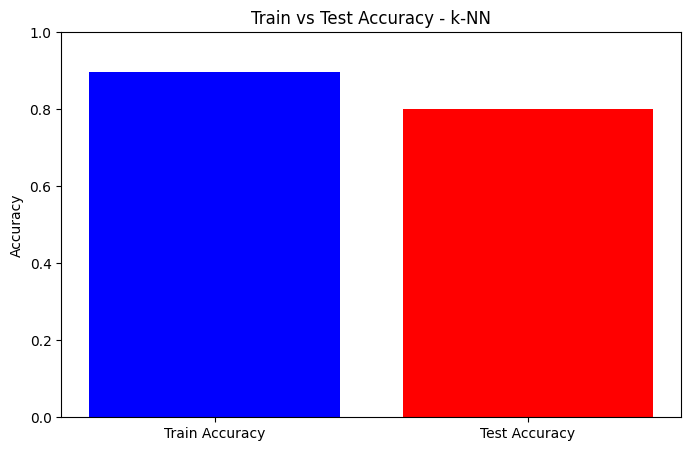

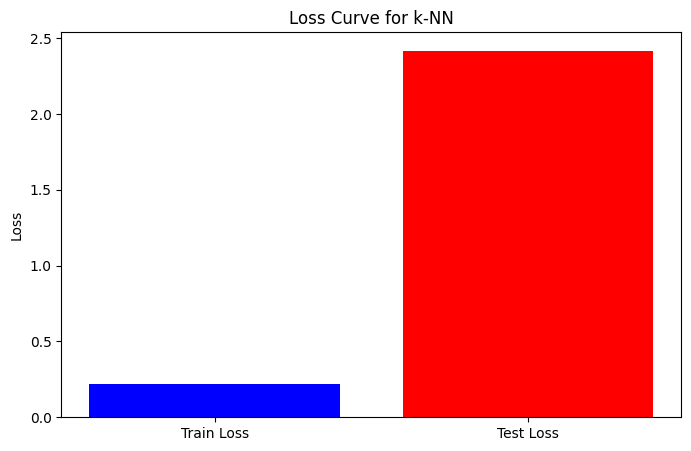

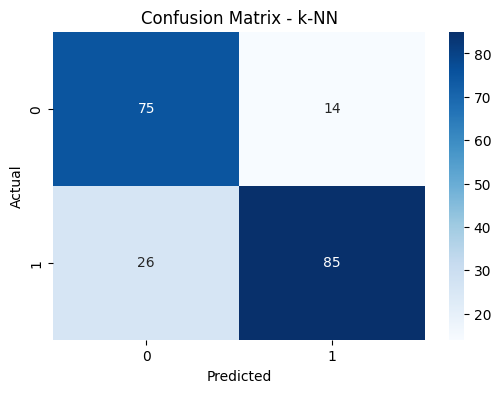

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-NN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy Comparison
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(8, 5))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["blue", "red"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy - k-NN")
plt.show()

# Loss Curve (only if `predict_proba` is available)
if hasattr(model, "predict_proba"):
    train_loss = log_loss(y_train, model.predict_proba(X_train))
    test_loss = log_loss(y_test, model.predict_proba(X_test))

    plt.figure(figsize=(8, 5))
    plt.bar(["Train Loss", "Test Loss"], [train_loss, test_loss], color=["blue", "red"])
    plt.ylabel("Loss")
    plt.title("Loss Curve for k-NN")
    plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - k-NN")
plt.show()
